<a href="https://colab.research.google.com/github/Addi-11/Face-Recognition/blob/main/Face_Rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3MB 9.7MB/s 


In [ ]:
!pip install facenet_pytorch

     |████████████████████████████████| 1.9MB 11.7MB/s 


In [ ]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from PIL import Image 
from numpy import savez_compressed
from numpy import asarray
from os import listdir
from mtcnn.mtcnn import MTCNN



In [ ]:
#Method to extract Face
def extract_image(image):
  img1 = Image.open(image)            #open the image
  img1 = img1.convert('RGB')          #convert the image to RGB format 
  pixels = asarray(img1)              #convert the image to numpy array
  detector = MTCNN()                  #assign the MTCNN detector
  f = detector.detect_faces(pixels)
  #fetching the (x,y)co-ordinate and (width-->w, height-->h) of the image
  x1,y1,w,h = f[0]['box']             
  x1, y1 = abs(x1), abs(y1)
  x2 = abs(x1+w)
  y2 = abs(y1+h)
  #locate the co-ordinates of face in the image
  store_face = pixels[y1:y2,x1:x2]
  plt.imshow(store_face)
  image1 = Image.fromarray(store_face,'RGB')    #convert the numpy array to object
  image1 = image1.resize((160,160))             #resize the image
  face_array = asarray(image1)                  #image to array
  return face_array



----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Facial recognition/training.csv')
test = pd.read_csv('/content/drive/MyDrive/Facial recognition/test.csv')
lookup = pd.read_csv('/content/drive/MyDrive/Facial recognition/IdLookupTable.csv')

In [ ]:
train.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [ ]:
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7039.000000,7039.000000,7036.000000,7036.000000,2271.000000,2271.000000,2267.000000,2267.000000,2268.000000,2268.000000,2268.000000,2268.000000,2270.000000,2270.000000,2225.000000,2225.000000,2270.000000,2270.000000,2236.000000,2236.000000,7049.000000,7049.000000,2269.000000,2269.000000,2270.000000,2270.000000,2275.000000,2275.000000,7016.000000,7016.000000
mean,66.359021,37.651234,30.306102,37.976943,59.159339,37.944752,73.330478,37.707008,36.652607,37.989902,22.384504,38.033495,56.068513,29.332678,79.482826,29.734861,39.322137,29.502998,15.871177,30.428166,48.374186,62.715884,63.285735,75.970714,32.900404,76.179768,47.975412,72.919443,48.569472,78.970146
std,3.448233,3.152926,3.083230,3.033621,2.690354,2.307332,3.405852,2.881438,2.350268,2.311907,3.057122,2.910368,3.485485,3.078134,3.986224,3.773744,3.209641,3.106869,3.622533,3.865772,4.280038,5.720567,4.079063,4.579724,3.964552,4.417814,3.323060,5.222500,4.269961,5.407844
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,3.980117,25.123828,17.888717,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082895,35.900451,28.783339,36.327681,58.039339,36.626283,71.716503,36.085523,35.506126,36.766783,20.585808,36.534382,54.515587,27.617244,77.673916,27.667948,37.552286,27.790607,13.562183,28.206046,46.602370,59.292697,61.257143,72.875707,30.797646,73.256472,46.494571,69.396748,46.573703,75.549715
50%,66.497566,37.528055,30.251378,37.813273,59.304615,37.878040,73.247824,37.639015,36.651562,37.944075,22.535954,37.867071,56.244975,29.528872,79.784229,29.773813,39.298848,29.569347,15.785709,30.320160,48.424713,63.451421,63.178286,75.778689,32.982305,76.000592,47.905490,72.605173,48.594978,78.696326
75%,68.024752,39.258449,31.768334,39.566729,60.519810,39.260348,75.015645,39.373489,37.753571,39.192917,24.237701,39.415051,57.946415,31.158830,81.590720,31.835621,40.917160,31.251664,17.999040,32.654768,50.330437,66.492686,65.376243,78.879123,35.101302,78.956357,49.296488,76.221644,50.677631,82.233993
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,61.428580,70.746797,79.787831,60.875896,94.269957,60.500298,76.582388,62.083177,58.418216,66.751329,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [ ]:
train.fillna(method = "ffill",inplace=True)
train.isnull().any().value_counts()

False    31
dtype: int64

In [ ]:
train.describe()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
count,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000,7049.000000
mean,66.358588,37.649140,30.306631,37.975901,59.224060,36.675731,73.746775,35.619961,37.214171,38.942849,22.162446,39.588348,54.194620,29.774418,80.468907,28.534791,38.954169,32.070739,15.138279,34.188305,48.374186,62.715884,69.586932,73.195985,33.799680,76.964546,50.425299,74.982529,48.565976,78.979256
std,3.447098,3.152072,3.083087,3.032590,1.537961,1.581946,1.961901,2.184829,1.393110,1.470456,1.747700,1.972413,2.370622,1.777130,2.398672,2.314226,1.846922,2.507250,2.140417,3.407792,4.280038,5.720567,4.932241,3.242852,2.350229,2.578721,2.543271,3.294983,4.266848,5.406621
min,22.763345,1.616512,0.686592,4.091264,19.064954,27.190098,27.571879,26.250023,5.751046,26.250023,3.980117,25.123828,17.888717,15.859361,32.206432,10.522325,6.921014,16.476000,3.826243,13.224453,12.944699,17.932414,22.923362,57.023258,2.245766,56.690208,12.605173,56.719043,12.536477,25.850503
25%,65.082643,35.900605,28.782316,36.327178,59.255347,36.065143,73.942694,34.624653,37.478531,39.355685,22.056816,39.645538,53.299787,29.987657,80.947787,27.977535,38.779298,31.430071,14.798890,32.994798,46.602370,59.292697,65.731401,71.862041,34.232759,77.339429,49.471414,75.963592,46.571821,75.553726
50%,66.493907,37.526919,30.253135,37.812736,59.255347,36.065143,73.942694,34.624653,37.478531,39.398041,22.056816,40.330122,53.299787,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,48.424713,63.451421,72.600433,71.862041,34.232759,77.339429,51.599453,75.963592,48.588662,78.704640
75%,68.024628,39.254400,31.768407,39.565928,59.255347,36.499692,73.942694,35.902613,37.478531,39.398041,22.056816,40.330122,54.311385,29.987657,80.947787,27.977535,38.779298,33.302596,14.798890,35.982760,50.330437,66.492686,72.600433,72.591200,34.232759,77.339429,51.599453,75.963592,50.676559,82.236528
max,94.689280,80.502649,85.039381,81.270911,84.440991,66.562559,95.258090,64.618230,70.714966,69.808803,61.428580,70.746797,79.787831,60.875896,94.269957,60.500298,76.582388,62.083177,58.418216,66.751329,89.438592,95.935644,84.767123,94.673637,74.017993,95.510678,83.989082,94.548359,89.438592,95.808983


In [ ]:
images = []
for i in range(0,7049):
    img = train["Image"][i].split(" ")
    img = ['0' if x ==" " else x for x in img]
    images.append(img)

In [ ]:
images = np.array(images,dtype='float')
images.shape

(7049, 9216)

In [ ]:
images

array([[238., 236., 237., ...,  70.,  75.,  90.],
       [219., 215., 204., ...,   1.,   1.,   1.],
       [144., 142., 159., ...,  78.,  78.,  77.],
       ...,
       [ 74.,  74.,  74., ...,  20.,  20.,  20.],
       [254., 254., 254., ..., 254., 254., 254.],
       [ 53.,  62.,  67., ..., 158., 158., 159.]])

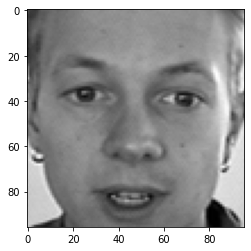

In [ ]:
xtrain = images.reshape(-1,96,96)
plt.imshow(xtrain[19].reshape(96,96),cmap='gray')
plt.show()

In [ ]:
for row in images:
    row/=255
images


array([[0.93333333, 0.9254902 , 0.92941176, ..., 0.2745098 , 0.29411765,
        0.35294118],
       [0.85882353, 0.84313725, 0.8       , ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.56470588, 0.55686275, 0.62352941, ..., 0.30588235, 0.30588235,
        0.30196078],
       ...,
       [0.29019608, 0.29019608, 0.29019608, ..., 0.07843137, 0.07843137,
        0.07843137],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       [0.20784314, 0.24313725, 0.2627451 , ..., 0.61960784, 0.61960784,
        0.62352941]])

In [ ]:
training = train.drop(["Image"],axis=1)
training.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [ ]:
y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]
    y_train.append(y)
ytrain = np.array(y_train,dtype = 'float')

In [ ]:
x_train = images

training the model for feature detection with Keras

In [ ]:
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend as K
from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
model = Sequential()
# model.add(Dense(30, activation='softmax'))
model.add(Convolution2D(32, (3, 3) ,activation='relu', input_shape=(96, 96, 1)))
model.add(Convolution2D(32, (3, 3) , padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3) , padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3) , padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(128, (3, 3) , padding="same",activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(30, activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 94, 94, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 94, 94, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0

In [ ]:
mmodel.compile(loss='mse',
              optimizer='adam',
              metrics=['mae',"accuracy"])

In [ ]:
images=images.reshape(-1,96,96,1)
images.shape

(7049, 96, 96, 1)

In [ ]:
history = model.fit(images, ytrain,epochs = 100,batch_size = 256,validation_split = 0.1)

Epoch 1/100
25/25 [==============================] - 44s 465ms/step - loss: 1651.7038 - mae: 33.5523 - accuracy: 0.2784 - val_loss: 2361.3059 - val_mae: 45.1297 - val_accuracy: 0.5986
Epoch 2/100
25/25 [==============================] - 8s 304ms/step - loss: 333.4024 - mae: 11.3819 - accuracy: 0.1966 - val_loss: 1350.7997 - val_mae: 33.6651 - val_accuracy: 0.5986
Epoch 3/100
25/25 [==============================] - 8s 303ms/step - loss: 280.4158 - mae: 9.1801 - accuracy: 0.3976 - val_loss: 839.3110 - val_mae: 25.7397 - val_accuracy: 0.5986
Epoch 4/100
25/25 [==============================] - 8s 302ms/step - loss: 230.7643 - mae: 8.3640 - accuracy: 0.3966 - val_loss: 402.8928 - val_mae: 17.8549 - val_accuracy: 0.5986
Epoch 5/100
25/25 [==============================] - 8s 302ms/step - loss: 98.8172 - mae: 6.6181 - accuracy: 0.2524 - val_loss: 477.5498 - val_mae: 19.8238 - val_accuracy: 0.5844
Epoch 6/100
25/25 [==============================] - 8s 302ms/step - loss: 89.9074 - mae: 6.165

In [ ]:
model.save("facial_features_model.h5")

In [ ]:
test.shape
test.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [ ]:
y_test = test
print(y_test["Image"])
test = y_test["Image"]
testimages = []
for i in range(0,1783):
    img = train["Image"][i].split(" ")
    img = ['0' if x ==" " else x for x in img]
    testimages.append(img)
testimages = np.array(testimages,dtype="float")

0       182 183 182 182 180 180 176 169 156 137 124 10...
1       76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2       177 176 174 170 169 169 168 166 166 166 161 14...
3       176 174 174 175 174 174 176 176 175 171 165 15...
4       50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...
                              ...                        
1778    101 101 101 100 100 97 97 98 102 149 214 206 1...
1779    201 191 171 158 145 140 136 130 123 115 108 10...
1780    28 28 29 30 31 32 33 34 39 44 46 46 49 54 61 7...
1781    104 95 71 57 46 52 65 70 70 67 76 72 69 69 72 ...
1782    63 61 64 66 66 64 65 70 69 70 77 83 63 34 22 2...
Name: Image, Length: 1783, dtype: object


In [ ]:
testimages/=255
testimages.shape

(1783, 9216)

In [ ]:
testimages = testimages.reshape(-1,96,96,1)
testimages.shape
#testimages

(1783, 96, 96, 1)

In [ ]:
result = model.predict(testimages,verbose=1)

56/56 [==============================] - 1s 18ms/step


In [ ]:
def euclidean(face_encoding1, face_encoding2):
  ssq= np.sum(np.square(face_encoding1 - face_encoding2))
  return np.sqrt(ssq)


In [ ]:
def preprocess_image(img_str): # taking path of image to be loaded
  face_array= extract_image(img)
  face_array = cv2.cvtColor(face_array, cv2.COLOR_RGB2GRAY)
  face_array= cv2.resize(face_array, (96, 96))
  face_array = face_array.reshape(-1,96,96,1)
  return face_array

In [ ]:
tf.autograph.set_verbosity(0)

In [ ]:
img1 = '/content/drive/MyDrive/Facial recognition/chris_hemsworth.jfif'
img2 = '/content/drive/MyDrive/Facial recognition/chris_hemsworth_2.jfif'

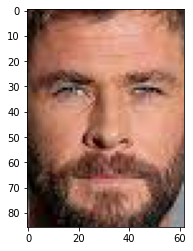

In [ ]:
fac1= extract_image(img1)
fac1= cv2.cvtColor(fac1, cv2.COLOR_RGB2GRAY)
face_array1= cv2.resize(fac1, (96, 96))
face_array1 = face_array1/255
face_array1 = face_array1.reshape(-1,96,96,1)

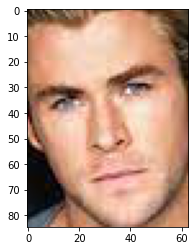

In [ ]:
fac2= extract_image(img2)
fac2= cv2.cvtColor(fac2, cv2.COLOR_RGB2GRAY)
face_array2= cv2.resize(fac2, (96, 96))
face_array2= face_array2/255
face_array2 = face_array2.reshape(-1,96,96,1)

In [ ]:
enc1= model.predict(face_array1)

In [ ]:
enc2= model.predict(face_array2)

In [ ]:
diff = euclidean(enc1, enc2)

In [ ]:
print(diff)

8.268144


In [ ]:
img3= '/content/drive/MyDrive/Facial recognition/chris_evans.jfif'

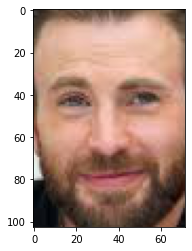

In [ ]:
fac3= extract_image(img3)
fac3= cv2.cvtColor(fac3, cv2.COLOR_RGB2GRAY)
face_array3= cv2.resize(fac3, (96, 96))
face_array3= face_array3/255
face_array3 = face_array3.reshape(-1,96,96,1)

In [ ]:
enc3= model.predict(face_array3)

In [ ]:
diff2 = euclidean(enc1, enc3)
print(diff2)

8.5584755


In [ ]:
img4= '/content/drive/MyDrive/Facial recognition/romanoff.jpg'

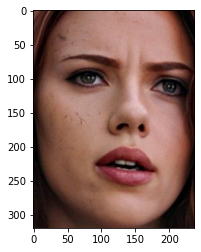

In [ ]:
fac4= extract_image(img4)
fac4= cv2.cvtColor(fac4, cv2.COLOR_RGB2GRAY)
face_array4= cv2.resize(fac4, (96, 96))
face_array4= face_array4/255
face_array4 = face_array4.reshape(-1,96,96,1)

In [ ]:
enc4= model.predict(face_array4)

In [ ]:
diff3 = euclidean(enc1, enc4)

In [ ]:
print(diff3)

16.830315


In [ ]:
threshold = 9.0

In [ ]:
import glob
import os
import shutil

In [ ]:
shutil.copy(img1, "/content/drive/MyDrive/Facial recognition/match")

'/content/drive/MyDrive/Facial recognition/match/chris_hemsworth.jfif'

In [ ]:
if diff<= threshold:
  shutil.copy(img2, "/content/drive/MyDrive/Facial recognition/match")
else:
  shutil.copy(img2, "/content/drive/MyDrive/Facial recognition/Different")

In [ ]:
if diff2 <= threshold:
  shutil.copy(img3, "/content/drive/MyDrive/Facial recognition/match")
else:
  shutil.copy(img3, "/content/drive/MyDrive/Facial recognition/Different")

In [ ]:
if diff3<= threshold:
  shutil.copy(img4, "/content/drive/MyDrive/Facial recognition/match")
else:
  shutil.copy(img4, "/content/drive/MyDrive/Facial recognition/Different")